# Clustering
I will try different options to cluster the data and see what results I get

In [1]:
import math
import pandas as pandas
import numpy as np
import matplotlib
import scipy.cluster.hierarchy as sch
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

data = pandas.read_json("../data/water_loss_data_set_1.json")

In [2]:
data = data[(data.timeStamp != "0000-00-00 00:00:00" ) & (data.timeStamp != "2000-01-01 00:00:00")] 
data = data[(data.tot1 != 0 ) & (data.analog2 != 0)]
data["timeStamp"] = pandas.to_datetime(data["timeStamp"], format="%Y-%m-%d %H:%M")

data["timeStamp"] = data["timeStamp"].dt.floor('h')
data["timeStamp"] = data["timeStamp"].dt.strftime("%Y-%m-%d %H:%M")
data["timeStamp"] = pandas.to_datetime(data["timeStamp"], format="%Y-%m-%d %H:%M")

data_249 = data[data['idflowmeter'] == "MAG8000_024905H318"]
data_248 = data[data['idflowmeter'] == "MAG8000_024805H318"]

data_249 = data_249.groupby("timeStamp").mean()
data_248 = data_248.groupby("timeStamp").mean()
data_248

,tot1,tot2,analog2
timeStamp,,,
2018-12-11 12:00:00,161.873400,0.00,0.819200
2018-12-11 13:00:00,264.282667,0.00,0.820333
2018-12-11 14:00:00,371.478000,0.00,0.818333
2018-12-11 15:00:00,487.519333,0.00,0.813167
2018-12-11 16:00:00,601.331833,0.00,0.810833
...,...,...,...
2020-04-01 10:00:00,977299.898333,-4713.21,1.527333
2020-04-01 11:00:00,977333.727167,-4713.21,1.528500
2020-04-01 12:00:00,977369.184833,-4713.21,1.530500


In [3]:
if type(data_249.index) == pandas.core.indexes.datetimes.DatetimeIndex:
    data_249.index = data_249.index.strftime("%Y-%m-%d %H:00")
    data_248.index = data_248.index.strftime("%Y-%m-%d %H:00")
    
# normalizacija
"""data_248 = ((data_248 - data_248.min()) / (data_248.max() - data_248.min()))
data_249 = ((data_249 - data_249.min()) / (data_249.max() - data_249.min()))
data_248"""

'data_248 = ((data_248 - data_248.min()) / (data_248.max() - data_248.min()))\ndata_249 = ((data_249 - data_249.min()) / (data_249.max() - data_249.min()))\ndata_248'

In [11]:
def selected_data(data_fun, start, end):
    return data_fun.loc[(data_fun.index >= start) & (data_fun.index <= end)]
    # "2020-01-20 00:00", "2020-01-24 23:00"
data_sel = selected_data(data_249, "2018-05-11 12:00:00", "2020-06-13 12:00:00")
data_sel

,tot1,tot2,analog2
timeStamp,,,
2018-11-23 08:00,1.410000,0.00,1.110000
2018-11-23 09:00,30.987273,0.00,1.103409
2018-11-23 10:00,87.809457,0.00,1.099022
2018-11-23 11:00,182.008000,0.00,1.101000
2018-11-23 12:00,278.252500,0.00,0.960333
...,...,...,...
2020-04-01 04:00,796739.947500,-293.97,0.826000
2020-04-01 05:00,796816.443333,-293.97,0.824667
2020-04-01 06:00,796915.016000,-293.97,0.817167


## Clustering pressure data

In [12]:
matrix = data_sel.reset_index().values
matrix_X = matrix[:, 3:]             # try different variations of clustering, and with different attributes
# array_Y = matrix[:, 3:].ravel()
# matrix_X 

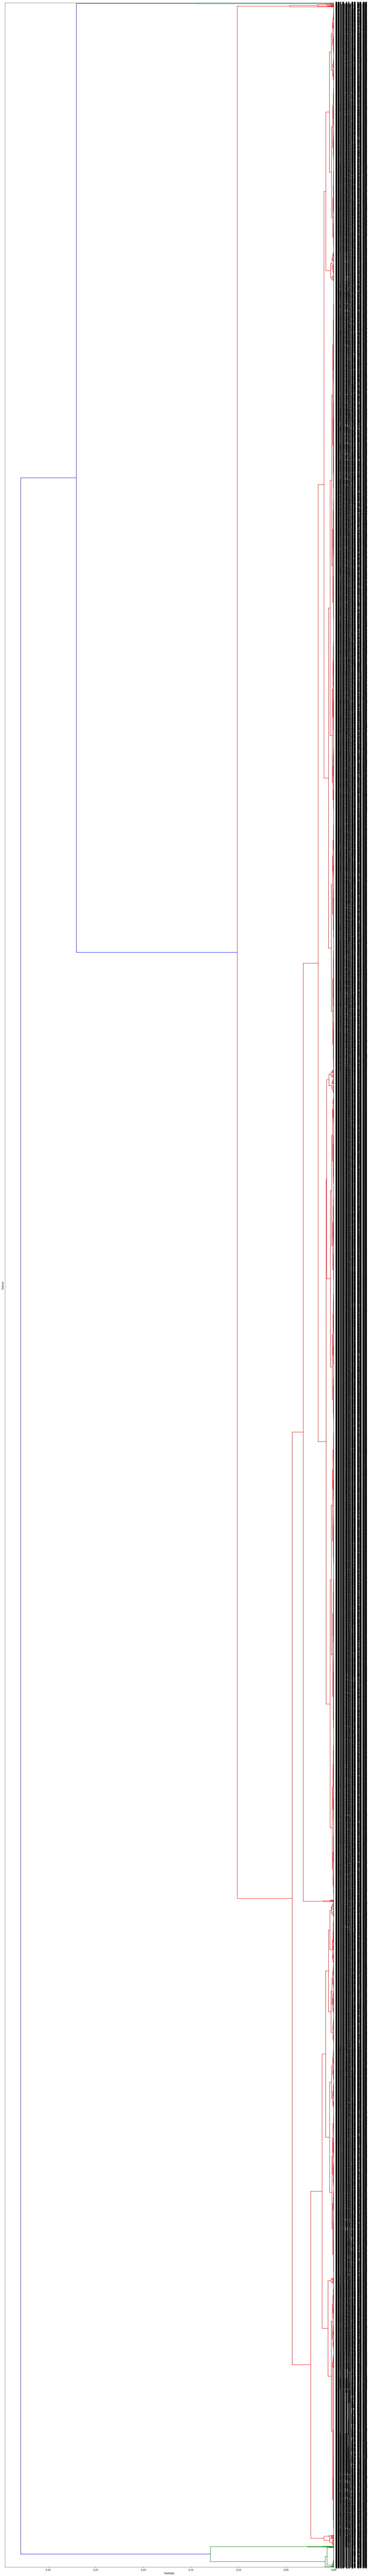

In [13]:
L = sch.linkage(matrix_X, method="average", metric="cityblock")
plt.figure(figsize=(25, 200))
D      = sch.dendrogram(L, leaf_font_size=15, labels=matrix[:, 0], orientation="left")
plt.xlabel("Razdalja")
plt.ylabel("Datum")
plt.show()

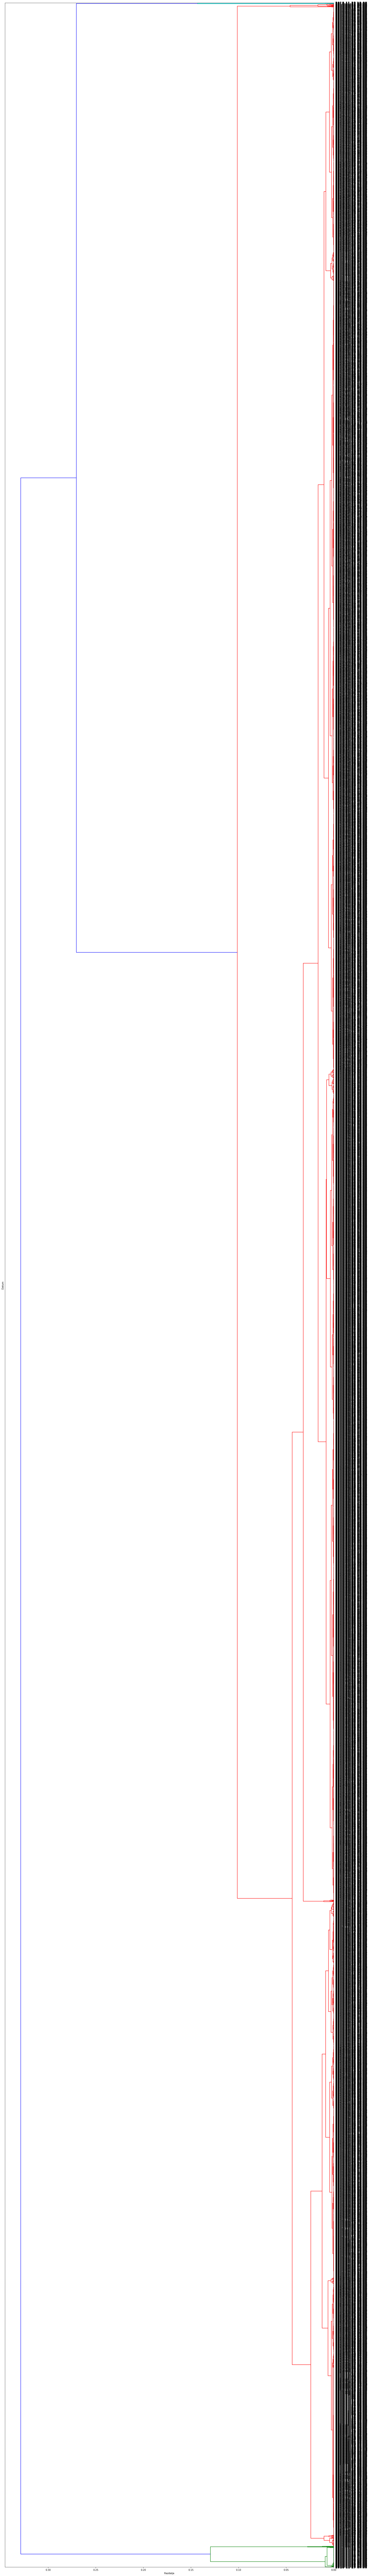

In [14]:
# single pa cosine zelo dobro loči glede na graf
# ward tudi
L = sch.linkage(matrix_X, method="centroid")
plt.figure(figsize=(25, 200))
D      = sch.dendrogram(L, leaf_font_size=15, labels=matrix[:, 0], orientation="left")
plt.xlabel("Razdalja")
plt.ylabel("Datum")
plt.show()

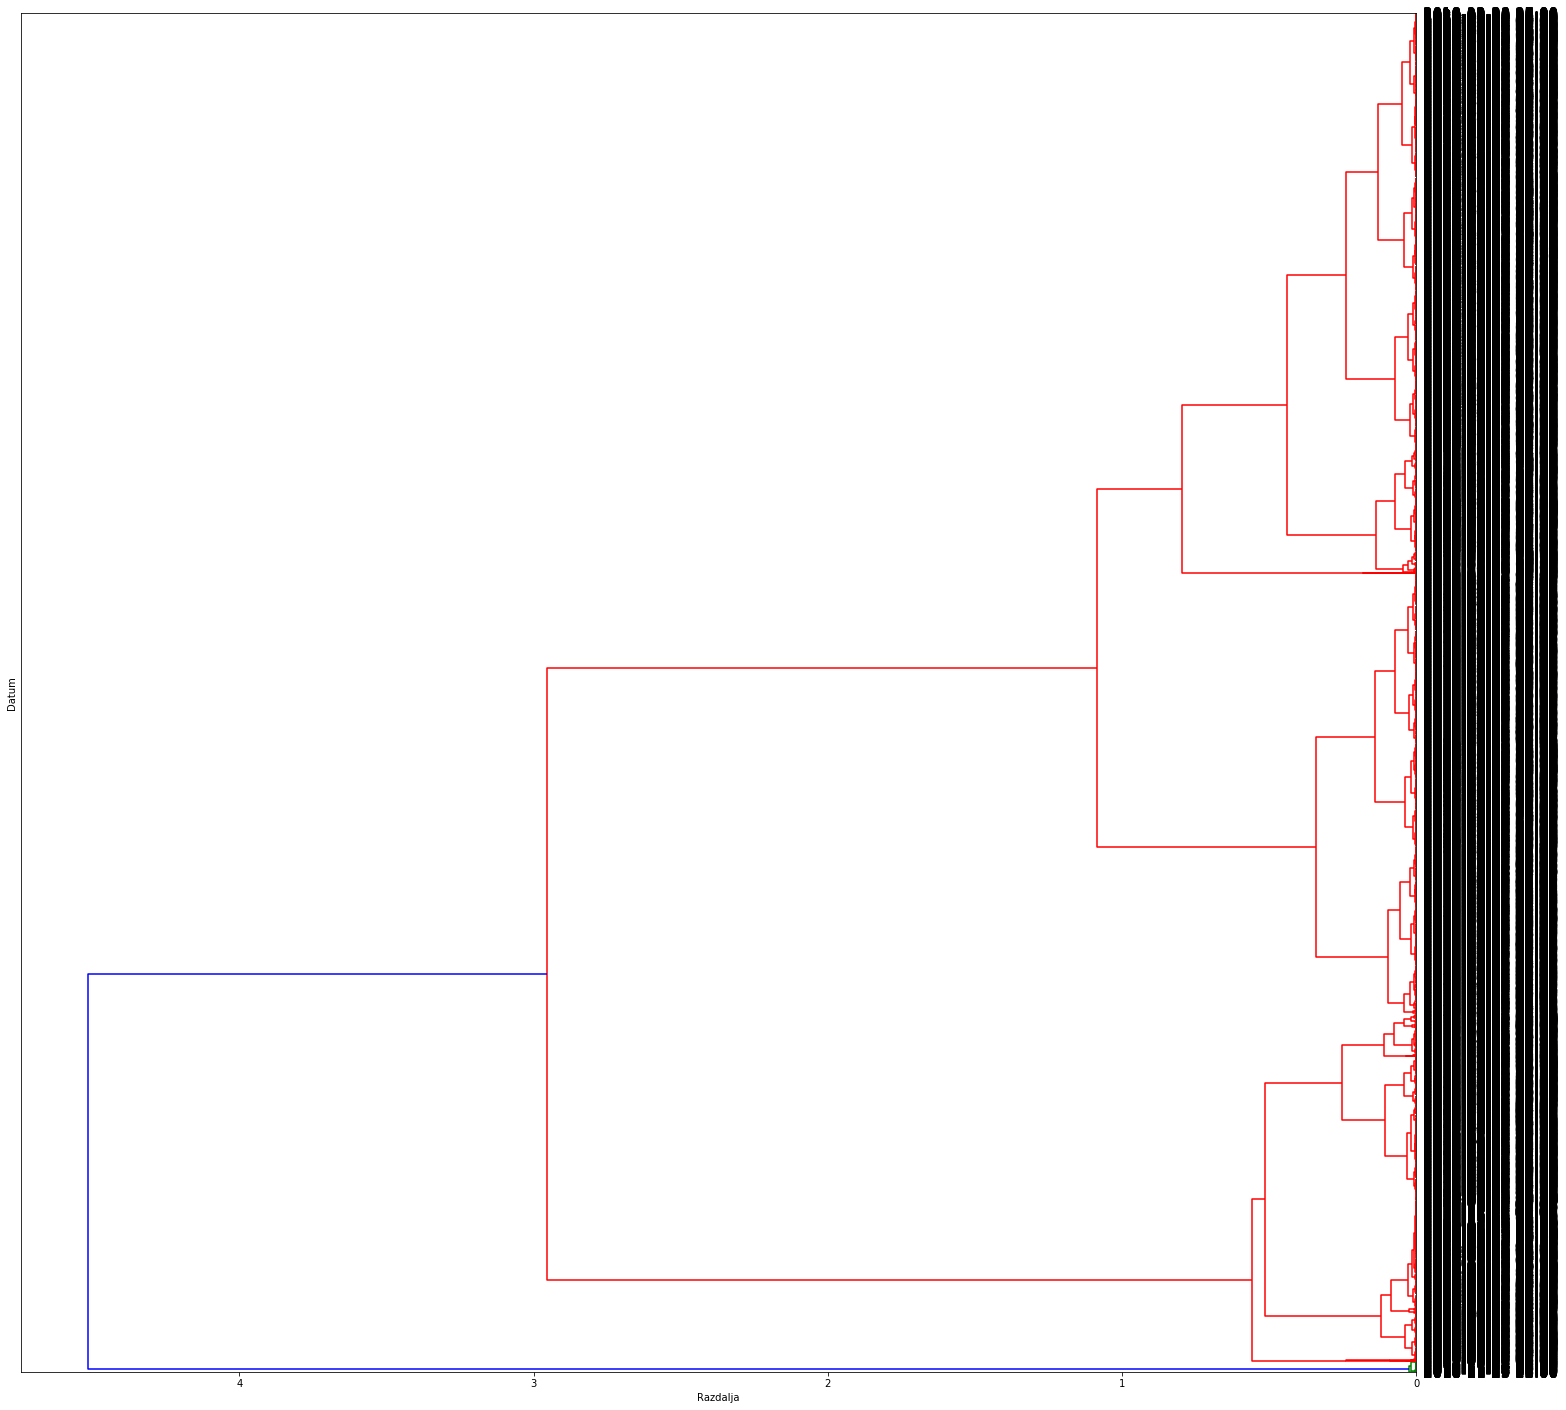

In [15]:
L = sch.linkage(matrix_X, method="ward")
plt.figure(figsize=(25, 25))
D      = sch.dendrogram(L, leaf_font_size=15, labels=matrix[:, 0], orientation="left")
plt.xlabel("Razdalja")
plt.ylabel("Datum")
plt.show()